In [1]:
# Dependencies
import pandas as pd                     # for handling and structuring data
import matplotlib.pyplot as plt         # for creating plots
import scipy.stats as st                # for statistical functions
import numpy as np                      # for generating random numbers and handling numerical operations
from scipy.stats import linregress      # for calculating linear regression
import matplotlib.ticker as ticker      # for formatting axis ticks (e.g., adding commas to large numbers)

# need to switch to csv
# Load the Excel file
file_path = 'Most Streamed Spotify Songs 2024 - Research.xlsx'
xls = pd.ExcelFile(file_path)

# Display sheet names to identify relevant data
print(xls.sheet_names)


['Views', 'Likes', 'Most Streamed Spotify Songs 202']


In [2]:
# Load the 'Likes' sheet
likes_df = pd.read_excel(xls, sheet_name='Likes', skiprows=2)

# Rename 'Row Labels' column
likes_df.rename(columns={'Row Labels': 'Song Title'}, inplace=True)

# Load the 'Views' sheet
views_df = pd.read_excel(xls, sheet_name='Views', skiprows=2)
views_df.rename(columns={'Row Labels': 'Song Title'}, inplace=True)

most_streamed_df = pd.read_excel(xls, sheet_name='Most Streamed Spotify Songs 202')

views_df.head()

,Song Title,Max of Spotify Popularity,Min of All Time Rank,Sum of Spotify Streams,Sum of YouTube Views,Sum of TikTok Views
0,Monkeys Spinning Monkeys,36.0,1018,11477477.0,11457166.0,2.332323e+11
1,Love You So,44.0,1918,16326628.0,7603329.0,2.148440e+11
2,Oh No,41.0,473,40284121.0,17978707.0,6.108856e+10
3,Funny Song,39.0,1539,5866282.0,11793478.0,3.994631e+10
4,Aesthetic,44.0,114,33025746.0,6658234.0,3.985063e+10


In [3]:
# Ensure that the key columns have consistent names across DataFrames to facilitate merging
likes_df.rename(columns={'Song Title': 'Song'}, inplace=True)
views_df.rename(columns={'Song Title': 'Song'}, inplace=True)

# Select relevant columns
likes_df = likes_df[['Song', 'Sum of TikTok Likes', 'Sum of YouTube Likes']]
views_df = views_df[['Song', 'Max of Spotify Popularity', 'Sum of Spotify Streams', 'Sum of YouTube Views', 'Sum of TikTok Views']]

views_df.head()

,Song,Max of Spotify Popularity,Sum of Spotify Streams,Sum of YouTube Views,Sum of TikTok Views
0,Monkeys Spinning Monkeys,36.0,11477477.0,11457166.0,2.332323e+11
1,Love You So,44.0,16326628.0,7603329.0,2.148440e+11
2,Oh No,41.0,40284121.0,17978707.0,6.108856e+10
3,Funny Song,39.0,5866282.0,11793478.0,3.994631e+10
4,Aesthetic,44.0,33025746.0,6658234.0,3.985063e+10


In [4]:
# Combine the two DataFrames based on the 'Song' column
merged_df = pd.merge(likes_df, views_df, on='Song', how='inner')

merged_df.head()

,Song,Sum of TikTok Likes,Sum of YouTube Likes,Max of Spotify Popularity,Sum of Spotify Streams,Sum of YouTube Views,Sum of TikTok Views
0,Without Me,2.354115e+08,38043329.0,83.0,6.336157e+09,4.304317e+09,2.394606e+09
1,Blinding Lights,3.373226e+08,10093211.0,83.0,8.542797e+09,8.338071e+08,3.501177e+09
2,goosebumps,2.049043e+08,13556723.0,82.0,2.892012e+09,1.413468e+09,1.899768e+09
3,Heat Waves,5.133344e+08,14947520.0,82.0,2.996181e+09,1.272898e+09,5.518430e+09
4,STAY (with Justin Bieber),2.246991e+09,14661425.0,78.0,6.214201e+09,1.256974e+09,2.371238e+10


In [5]:
# Remove rows with missing values
merged_df.dropna(inplace=True)


In [6]:
# Create top 500 dataframe

# Sort DataFrame by TikTok Views in descending order
top_500_tiktok_df = merged_df.sort_values(by='Sum of TikTok Views', ascending=False).head(501)

# Remove the 'Grand Total' row
top_500_tiktok_df = top_500_tiktok_df[top_500_tiktok_df['Song'] != 'Grand Total']

# Apply styling for better readability (for display purposes)
formatted_top_500_df = top_500_tiktok_df[['Song', 'Sum of TikTok Views', 'Sum of Spotify Streams']].style.format({
    'Sum of TikTok Likes': '{:,.2f}',
    'Sum of YouTube Likes': '{:,.2f}',
    'Sum of Spotify Streams': '{:,.2f}',
    'Sum of YouTube Views': '{:,.2f}',
    'Sum of TikTok Views': '{:,.2f}',
    'Max of Spotify Popularity': '{:,}'  # Add commas, no decimals
})


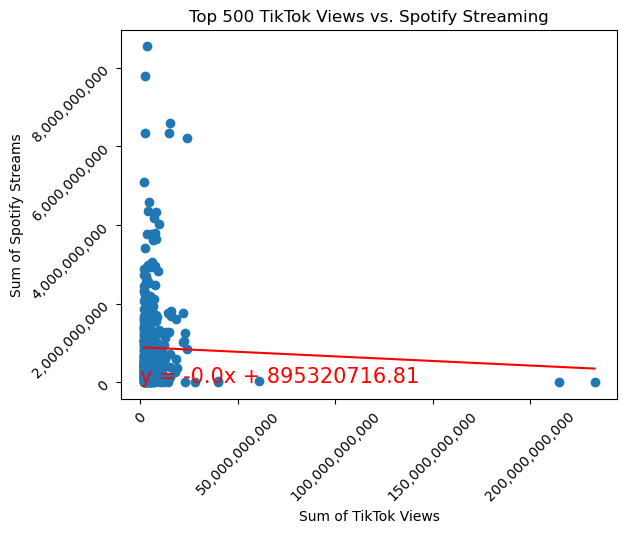

The r^2-value is: 0.0010268219830998492


In [7]:
# Spotify vs TikTok Views
# Does high TikTok views correlate to high spotify streams?

x_values = top_500_tiktok_df['Sum of TikTok Views']
y_values = top_500_tiktok_df['Sum of Spotify Streams']

# the output will be a tuple of multiple values  for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))   # print the equation in my graph (string)

#the scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

plt.xlabel("Sum of TikTok Views")
plt.ylabel("Sum of Spotify Streams")
plt.title("Top 500 TikTok Views vs. Spotify Streaming")
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Adjust x-axis and y-axis to show full values (not in millions) with commas
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.show()

print(f"The r^2-value is: {rvalue**2}")

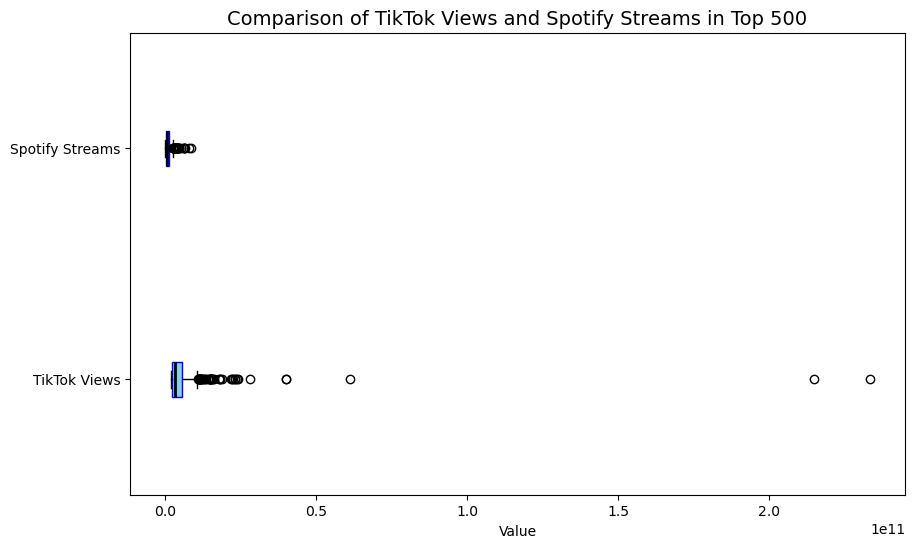

In [8]:
# Create the combined box plot for TikTok Views and Spotify Streams
plt.figure(figsize=(10, 6))

# Create a list of the two columns to compare
data = [top_500_tiktok_df['Sum of TikTok Views'], top_500_tiktok_df['Sum of Spotify Streams']]

# Plot the box plot
plt.boxplot(data, vert=False, patch_artist=True,
            boxprops=dict(facecolor='skyblue', color='blue'),
            medianprops=dict(color='black', linewidth=2))

# Add labels for the x-axis
plt.yticks([1, 2], ['TikTok Views', 'Spotify Streams'])  # Label the y-axis for the two groups

# Title and axis labels
plt.title('Comparison of TikTok Views and Spotify Streams in Top 500', fontsize=14)
plt.xlabel('Value')

# Display the plot
plt.show()


In [12]:
# Does the top 10 most viewed TikTok songs have high spotify streaming?

# Create a bar chat

# Sort DataFrame by TikTok Views in descending order
top_ten_tiktok_df = top_500_tiktok_df.sort_values(by='Sum of TikTok Views', ascending=False).head(10)

# Display top 10 TikTok-viewed songs with their Spotify Streams
top_ten_tiktok_df[['Song', 'Sum of TikTok Views', 'Sum of Spotify Streams']]

# Apply styling for better readability (for display purposes)
formatted_ten_tiktok_df = top_ten_tiktok_df[['Song', 'Sum of TikTok Views', 'Sum of Spotify Streams']].style.format({
    'Sum of TikTok Views': '{:,.2f}',
    'Sum of Spotify Streams': '{:,.2f}',  # Add commas, 2 decimals
})

formatted_ten_tiktok_df


,Song,Sum of TikTok Views,Sum of Spotify Streams
3201,Monkeys Spinning Monkeys,"233,232,311,463.00","11,477,477.00"
2962,Love You So,"214,843,956,590.00","16,326,628.00"
2863,Oh No,"61,088,562,861.00","40,284,121.00"
3500,Funny Song,"39,946,312,291.00","5,866,282.00"
3011,Aesthetic,"39,850,634,464.00","33,025,746.00"
3646,Pieces,"28,032,695,489.00","5,467,217.00"
407,love nwantiti (ah ah ah),"23,933,379,729.00","853,451,422.00"
4,STAY (with Justin Bieber),"23,712,377,029.00","6,214,200,698.00"
108,Astronaut In The Ocean,"23,156,752,648.00","1,251,675,613.00"
3503,Beat Automotivo Tan Tan Tan Viral,"22,918,660,728.00","7,382,759.00"


In [21]:
# Create a bar chart comparing percentages of TikTok Views and Spotify streaming

# Calculate the percentages
total_tiktok = top_ten_tiktok_df['Sum of TikTok Views'].sum()     # find the total sum first
total_spotify  = top_ten_tiktok_df['Sum of Spotify Streams'].sum()

# Convert each song into a percentage of the total
top_ten_tiktok_df['TikTok Percentage'] = (top_ten_tiktok_df['Sum of TikTok Views'] / total_tiktok) * 100
top_ten_tiktok_df['Spotify Percentage'] = (top_ten_tiktok_df['Sum of Spotify Streams'] / total_spotify) * 100

# Apply styling for better readability
formatted_ten_tiktok_df = top_ten_tiktok_df[['Song', 'Sum of TikTok Views', 'Sum of Spotify Streams', 'TikTok Percentage', 'Spotify Percentage']].style.format({
    'Sum of TikTok Views': '{:,.2f}',
    'Sum of Spotify Streams': '{:,.2f}',
    'TikTok Percentage': '{:.0f}%',
    'Spotify Percentage': '{:.0f}%'
})

formatted_ten_tiktok_df

,Song,Sum of TikTok Views,Sum of Spotify Streams,TikTok Percentage,Spotify Percentage
3201,Monkeys Spinning Monkeys,"233,232,311,463.00","11,477,477.00",33%,0%
2962,Love You So,"214,843,956,590.00","16,326,628.00",30%,0%
2863,Oh No,"61,088,562,861.00","40,284,121.00",9%,0%
3500,Funny Song,"39,946,312,291.00","5,866,282.00",6%,0%
3011,Aesthetic,"39,850,634,464.00","33,025,746.00",6%,0%
3646,Pieces,"28,032,695,489.00","5,467,217.00",4%,0%
407,love nwantiti (ah ah ah),"23,933,379,729.00","853,451,422.00",3%,10%
4,STAY (with Justin Bieber),"23,712,377,029.00","6,214,200,698.00",3%,74%
108,Astronaut In The Ocean,"23,156,752,648.00","1,251,675,613.00",3%,15%
3503,Beat Automotivo Tan Tan Tan Viral,"22,918,660,728.00","7,382,759.00",3%,0%


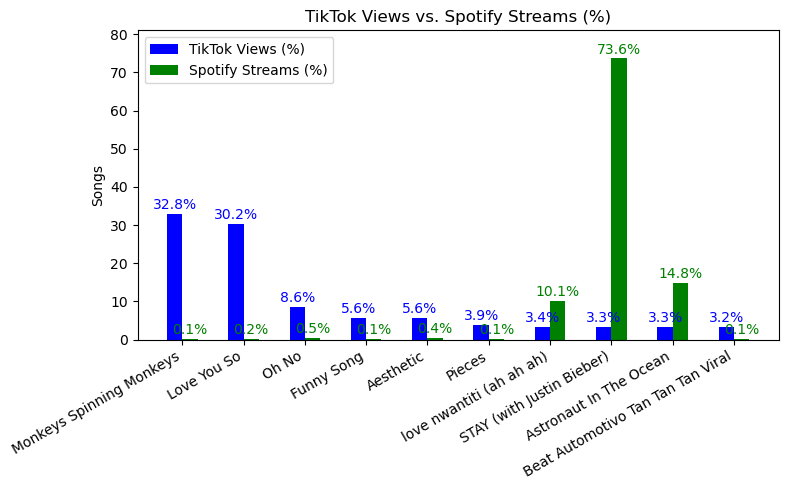

In [23]:
# Prepare the bar chart
x = np.arange(len(top_ten_tiktok_df['Song']))  # the label locations
width = 0.25                                   # the width of the bars

# Create the subplot
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the bars
tiktok_bar = ax.bar(x-width/2, top_ten_tiktok_df['TikTok Percentage'], width, label='TikTok Views (%)', color='blue')
spotify_bar = ax.bar(x+width/2, top_ten_tiktok_df['Spotify Percentage'], width, label='Spotify Streams (%)', color='green')

# Formatting
ax.set_ylabel('Percentage (%)')
ax.set_ylabel('Songs')
ax.set_title('TikTok Views vs. Spotify Streams (%)')
ax.set_xticks(x)
ax.set_xticklabels(top_ten_tiktok_df['Song'], rotation=30, ha='right')  # Rotate labels for readability
ax.legend()

# Fix y-limit to match percentage values
max_percentage = max(top_ten_tiktok_df['TikTok Percentage'].max(), top_ten_tiktok_df['Spotify Percentage'].max())
ax.set_ylim(0, max_percentage * 1.1)     # Set y-limit slightly above max percentage

# Add labels above bars
for i, (tiktok, spotify) in enumerate(zip(top_ten_tiktok_df['TikTok Percentage'], top_ten_tiktok_df['Spotify Percentage'])):
    ax.text(i - width/2, tiktok + 0.5, f"{tiktok:.1f}%", ha='center', va='bottom', fontsize=10, color='blue')
    ax.text(i + width/2, spotify + 0.5, f"{spotify:.1f}%", ha='center', va='bottom', fontsize=10, color='green')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()
